# Session 12c - Text Mining
## Analysing and summarising collections of text
### Sentiment

In [ ]:
# Install textblob
! conda install -c conda-forge textblob --yes

In [1]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

## Load in Some Tweets

In [2]:
tweets = pd.read_csv('tweets_for_sentiment_analysis.csv', index_col='index')

In [3]:
tweets

,id,full_text
index,,
0,1187640977835679744,@demented_tj @Jacob_Rees_Mogg Well you are act...
1,1187636934149058560,"RT @BorisJohnson: Hi folks, as you all know we..."
2,1187641432347152384,"RT @LibDemLords: ""We have absolutely nothing o..."
3,1187629727969886208,Listening to Sajid Javid on R4 is maddening. I...
4,1187638791172960257,RT @andytb91: Tired of hearing that #Brexit = ...
...,...,...
9995,1187381051838124033,Parliament is doing close to naff all for the ...
9996,1187640322869878784,RT @BrugesGroup: Tony Blair says that Brexit h...
9997,1187625395262296064,I wonder if he’s got the point yet? \n\nWE WAN...


## Measuring Sentiment

In [4]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [5]:
get_sentiment("I love every brilliant thing right now. Super happy")

0.5638095238095238

In [6]:
get_sentiment("My name is James")

0.0

In [7]:
get_sentiment("I am very angry")

-0.65

## Applying it to a whole dataset

In [8]:
tweets['sentiment'] = tweets['full_text'].apply(get_sentiment)

In [10]:
def label_sentiment(value):
    if value > 0.5:
        return 'pos'
    elif value < -0.5:
        return 'neg'
    else:
        return 'neutral'

In [11]:
tweets['sentiment_label'] = tweets['sentiment'].apply(label_sentiment)

In [12]:
tweets.head()

,id,full_text,sentiment,sentiment_label
index,,,,
0,1187640977835679744,@demented_tj @Jacob_Rees_Mogg Well you are act...,0.375000,neutral
1,1187636934149058560,"RT @BorisJohnson: Hi folks, as you all know we...",0.000000,neutral
2,1187641432347152384,"RT @LibDemLords: ""We have absolutely nothing o...",-0.100000,neutral
3,1187629727969886208,Listening to Sajid Javid on R4 is maddening. I...,-0.066667,neutral
4,1187638791172960257,RT @andytb91: Tired of hearing that #Brexit = ...,-0.400000,neutral


## Visuals 
### Distribution of Sentiment

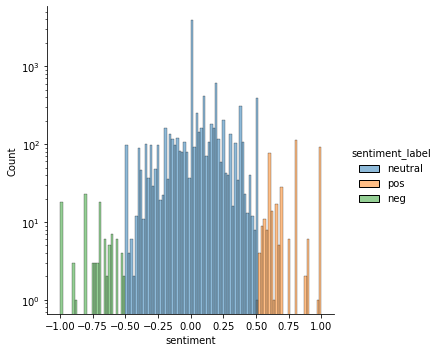

In [15]:
sns.displot(data=tweets, x='sentiment', hue='sentiment_label')
plt.yscale('log')

<AxesSubplot:xlabel='sentiment'>

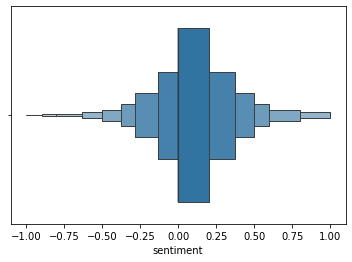

In [16]:
sns.boxenplot(data=tweets, x='sentiment')